In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [3]:
class Cavity:
    # References:
    # An integrated nanophotonic quantum register based on silicon-vacancy spins in diamond, Phys. Rev. B 100, 165428 (2019)
    # Cavity-based quantum networks with single atoms and optical photons, Rev. Mod. Phys.  87, 1379 (2015)
    
    def __init__(self, params=None):
        
        if params is not None:
            self.set_params(params)
        else:
            # Atom parameters (units: s^-1)
            self.w_a = 1     # Atom resonance frequency
            self.g = 5       # Single-photon Rabi frequency
            self.gamma = 1   # Atom linewidth

            # Cavity parameters (units: s^-1)
            self.w_c = 1     # Cavity resonance frequency
            self.k_in = 1    # In-coupling mirror decay rate
            self.k_out = 1   # Out-coupling mirror decay rate
            self.k_tot = 2   # Cavity linewidth (k_tot = k_in + k_out + k_other)            
    
    def set_params(self, new_params):
        """ Update the instance params with a new set of params from a dictionary. """
        self.__dict__.update(new_params)

    @staticmethod
    def reflectance_function(w, w_a, g, gamma, w_c, k_in, k_out, k_tot):
        """ Reflectance as a function of laser frequency w. Used for curve fitting. """
        r = 1 - (2 * k_in / (1j * (w - w_c) + k_tot + g ** 2 / (1j * (w - w_a) + gamma)))
        return (r * r.conjugate()).real
        
    @staticmethod
    def transmittance_function(w, w_a, g, gamma, w_c, k_in, k_out, k_tot):
        """ Transmittance as a function of laser frequency w. Used for curve fitting. """
        t = 2 * np.sqrt(k_in * k_out) / (1j * (w - w_c) + k_tot + g ** 2 / (1j * (w - w_a) + gamma))
        return (t * t.conjugate()).real
        
    def reflectance(self, w, params=None):
        """ Reflectance as a function of laser frequency w. Uses the instance parameters if None provided. """
        params = params if params is not None else self.__dict__
        return Cavity.reflectance_function(w, **params)
    
    def transmittance(self, w, params=None):
        """ Transmittance as a function of laser frequency w. Uses the instance parameters if None provided. """
        params = params if params is not None else self.__dict__
        return Cavity.transmittance_function(w, **params)
    
    def fit_reflection(self, freqs, spectrum):
        """ Fit the reflection spectrum as a function of the laser frequency sweep (freqs). Returns the fitted parameters. """
        params, covariance = curve_fit(Cavity.reflectance_function, freqs, spectrum, p0=[1, 5.1, 1.2, 1.3, 1.25, 0.9, 2.5], maxfev=1000)
        return dict(zip(["w_a", "g", "gamma", "w_c", "k_in", "k_out", "k_tot"], params))

C:\Users\Qi\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\optimize\minpack.py:807: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


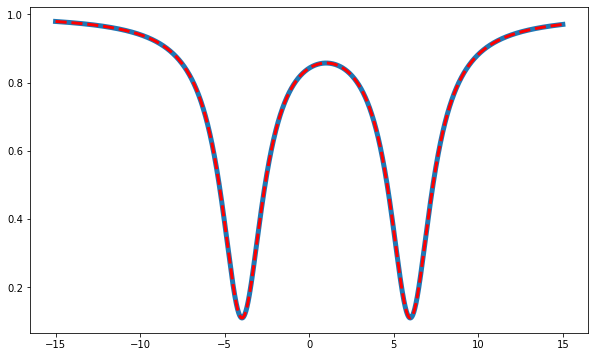

In [23]:
c = Cavity()
w_arr = np.linspace(-15, 15, 10000)
params = c.fit_reflection(w_arr, c.reflectance(w_arr))

plt.figure(figsize=[10,6])
plt.plot(w_arr, c.reflectance(w_arr), linewidth=5)
plt.plot(w_arr, c.reflectance(w_arr, params), 'r--', linewidth=3)
w_arr = np.linspace(-40, 40, 10000)

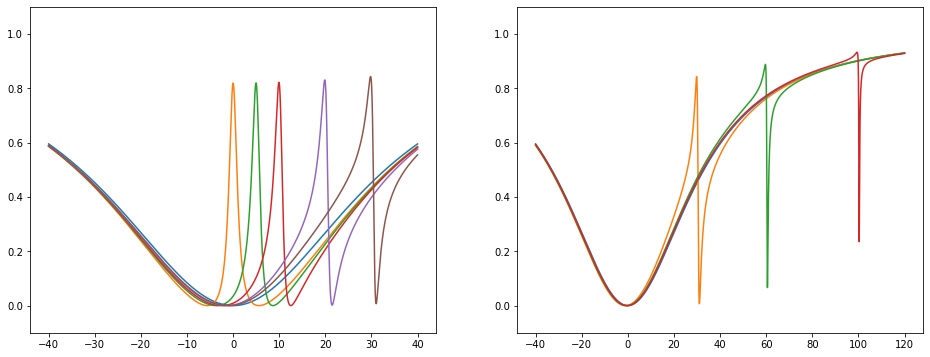

In [29]:
w_arr = np.linspace(-40, 40, 10000)
plt.figure(figsize=[16, 6])
plt.subplot(1, 2, 1)
plt.ylim([-0.1, 1.1])

c = Cavity({'w_a': 0, 'g': 0, 'gamma': .1, 'w_c': 0., 'k_in': 16.5, 'k_out': 0., 'k_tot': 33})
plt.plot(w_arr, c.reflectance(w_arr))
c = Cavity({'w_a': 0, 'g': 5.6, 'gamma': .1, 'w_c': 0., 'k_in': 16.5, 'k_out': 0., 'k_tot': 33})
plt.plot(w_arr, c.reflectance(w_arr))
c = Cavity({'w_a': 5, 'g': 5.6, 'gamma': .1, 'w_c': 0., 'k_in': 16.5, 'k_out': 0., 'k_tot': 33})
plt.plot(w_arr, c.reflectance(w_arr))
c = Cavity({'w_a': 10, 'g': 5.6, 'gamma': .1, 'w_c': 0., 'k_in': 16.5, 'k_out': 0., 'k_tot': 33})
plt.plot(w_arr, c.reflectance(w_arr))
c = Cavity({'w_a': 20, 'g': 5.6, 'gamma': .1, 'w_c': 0., 'k_in': 16.5, 'k_out': 0., 'k_tot': 33})
plt.plot(w_arr, c.reflectance(w_arr))
c = Cavity({'w_a': 30, 'g': 5.6, 'gamma': .1, 'w_c': 0., 'k_in': 16.5, 'k_out': 0., 'k_tot': 33})
plt.plot(w_arr, c.reflectance(w_arr))

w_arr2 = np.linspace(-40, 120, 10000)
plt.subplot(1, 2, 2)
plt.ylim([-0.1, 1.1])

c = Cavity({'w_a': 0, 'g': 0, 'gamma': .1, 'w_c': 0., 'k_in': 16.5, 'k_out': 0., 'k_tot': 33})
plt.plot(w_arr2, c.reflectance(w_arr2))
c = Cavity({'w_a': 30, 'g': 5.6, 'gamma': .1, 'w_c': 0., 'k_in': 16.5, 'k_out': 0., 'k_tot': 33})
plt.plot(w_arr2, c.reflectance(w_arr2))
c = Cavity({'w_a': 60, 'g': 5.6, 'gamma': .1, 'w_c': 0., 'k_in': 16.5, 'k_out': 0., 'k_tot': 33})
plt.plot(w_arr2, c.reflectance(w_arr2))
c = Cavity({'w_a': 100, 'g': 5.6, 'gamma': .1, 'w_c': 0., 'k_in': 16.5, 'k_out': 0., 'k_tot': 33})
plt.plot(w_arr2, c.reflectance(w_arr2))

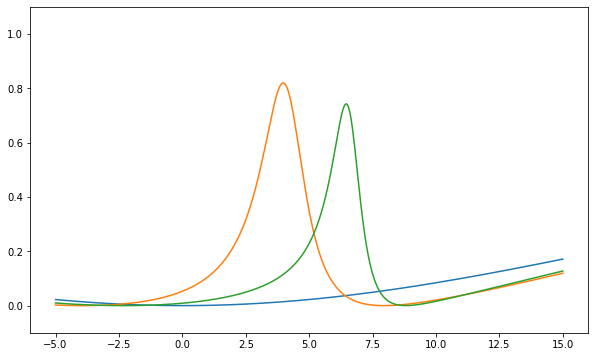

In [113]:
w_arr = np.linspace(-5, 15, 10000)
plt.figure(figsize=[10, 6])
plt.ylim([-0.1, 1.1])

c = Cavity({'w_a': 0, 'g': 0, 'gamma': .1, 'w_c': 0., 'k_in': 16.5, 'k_out': 0., 'k_tot': 33})
plt.plot(w_arr, c.reflectance(w_arr))
c = Cavity({'w_a': 4, 'g': 5.6, 'gamma': .1, 'w_c': 0., 'k_in': 16.5, 'k_out': 0., 'k_tot': 33})
plt.plot(w_arr, c.reflectance(w_arr))
c = Cavity({'w_a': 6.5, 'g': 4.5, 'gamma': .1, 'w_c': 0., 'k_in': 16.5, 'k_out': 0., 'k_tot': 33})
plt.plot(w_arr, c.reflectance(w_arr))

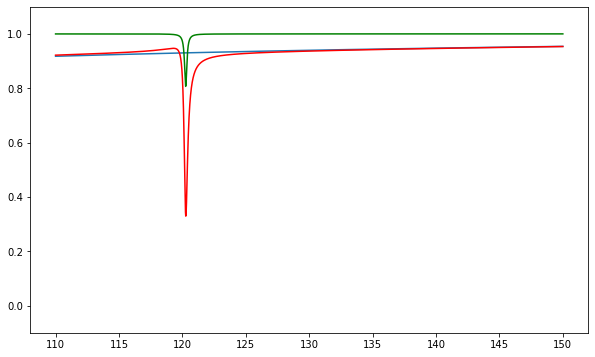

In [82]:
w_arr = np.linspace(110, 150, 10000)
plt.figure(figsize=[10, 6])
plt.ylim([-0.1, 1.1])

c = Cavity({'w_a': 0, 'g': 0, 'gamma': .1, 'w_c': 0., 'k_in': 16.5, 'k_out': 0., 'k_tot': 33})
plt.plot(w_arr, c.reflectance(w_arr))
c = Cavity({'w_a': 120, 'g': 5.6, 'gamma': .1, 'w_c': 0., 'k_in': 16.5, 'k_out': 0., 'k_tot': 33})
plt.plot(w_arr, c.reflectance(w_arr), 'r')
# c = Cavity({'w_a': 120, 'g': 15.6, 'gamma': .1, 'w_c': 0., 'k_in': 16.5, 'k_out': 0., 'k_tot': 33})
# plt.plot(w_arr, c.reflectance(w_arr))
# c = Cavity({'w_a': 120, 'g': 5.6, 'gamma': .5, 'w_c': 0., 'k_in': 16.5, 'k_out': 0., 'k_tot': 33})
# plt.plot(w_arr, c.reflectance(w_arr))
c = Cavity({'w_a': 120, 'g': 5.6, 'gamma': .1, 'w_c': 0., 'k_in': 2.5, 'k_out': 0., 'k_tot': 3})
plt.plot(w_arr, c.reflectance(w_arr), 'g')